Exercise 1: Data preprocessing - Wine Quality

In [1]:
#Load the data using pandas
#Import all the required packages
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

wineRed = pd.read_csv('winequality-red.csv',header = 0,delimiter = ';')
wineWhite = pd.read_csv('winequality-white.csv',header = 0,delimiter = ';')


print("wineRed\n\n",wineRed.describe())
print("wineWhite\n\n",wineWhite.describe())

#The wine quality has discrete values and it eill be better to use logistic regression
#print("WineQuality  ",wineRed['fixed acidity'].unique())

wineRed

        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.00000

In [2]:
#Checking for na values in any rows
print("NA's present : ",wineRed.isnull().any().any())

NA's present :  False


In [3]:
#3. Split the data into test and train
#Generate a random list of true and false and assign train and test based on those values
redSplit = np.random.rand(wineRed.shape[0]) < 0.8
#Assign train to true
trainRed = wineRed[redSplit]
#Assign test to false
testRed = wineRed[~redSplit]

print("Red Wine\n")
print("Train shape : ",trainRed.shape,"\nTest shape : ",testRed.shape)

#Generate a random list of true and false and assign train and test based on those values
whiteSplit = np.random.rand(wineWhite.shape[0]) < 0.8
#Assign train to true
trainWhite = wineWhite[whiteSplit]
#Assign test to false
testWhite = wineWhite[~whiteSplit]

print("\n\nWhite Wine\n")
print("Train shape : ",trainWhite.shape,"\nTest shape : ",testWhite.shape)

Red Wine

Train shape :  (1276, 12) 
Test shape :  (323, 12)


White Wine

Train shape :  (3944, 12) 
Test shape :  (954, 12)


Exercise 2: Linear Regression with Gradient Descent

In [4]:
#RedWine
xTrainRed = trainRed.loc[:,trainRed.columns != 'quality']
yTrainRed = trainRed.loc[:,trainRed.columns == 'quality']
xTestRed = testRed.loc[:,testRed.columns != 'quality']
yTestRed = testRed.loc[:,testRed.columns == 'quality']

#WhiteWine
xTrainWhite = trainWhite.loc[:,trainWhite.columns != 'quality']
yTrainWhite = trainWhite.loc[:,trainWhite.columns == 'quality']
xTestWhite = testWhite.loc[:,testWhite.columns != 'quality']
yTestWhite = testWhite.loc[:,testWhite.columns == 'quality']


In [5]:
#2.Linear Regression Base Model-Red Wine to calculate the base model
xTrainRed = np.column_stack([xTrainRed,np.ones(len(xTrainRed))])
xTestRed = np.column_stack([xTestRed,np.ones(len(xTestRed))]) 
    
A = xTrainRed.T.dot(xTrainRed)
b = xTrainRed.T.dot(yTrainRed)
betaOriginal = np.linalg.solve(A,b)
print("Beta Values for Red Wine : ",betaOriginal)
#print((yTestRed)-xTestRed.dot(betaOriginal))

#white wine
xTrainWhite = np.column_stack([xTrainWhite,np.ones(len(xTrainWhite))])
xTestWhite = np.column_stack([xTestWhite,np.ones(len(xTestWhite))]) 
    
A = xTrainWhite.T.dot(xTrainWhite)
b = xTrainWhite.T.dot(yTrainWhite)
betaOriginal = np.linalg.solve(A,b)
print("\n\nBeta Values for Red Wine : ",betaOriginal)


Beta Values for Red Wine :  [[  5.85145194e-02]
 [ -9.97456558e-01]
 [ -3.34906678e-01]
 [  4.57193584e-02]
 [ -1.87353746e+00]
 [  2.74141023e-03]
 [ -2.88703729e-03]
 [ -4.27866275e+01]
 [ -3.29103040e-01]
 [  1.02627362e+00]
 [  2.66439135e-01]
 [  4.61882304e+01]]


Beta Values for Red Wine :  [[  1.11452605e-01]
 [ -1.86795888e+00]
 [  4.25600752e-02]
 [  9.77697791e-02]
 [ -1.78020318e-01]
 [  4.65436232e-03]
 [  2.23211543e-04]
 [ -2.08966616e+02]
 [  8.21325159e-01]
 [  7.61278795e-01]
 [  1.25042513e-01]
 [  2.08224054e+02]]


In [6]:
#3.Least square loss function
def leastSquareLoss(x,y,beta):
    yPredicted = x.dot(beta)
    leastSquareLoss = (np.square(y-yPredicted)).sum()
    return(leastSquareLoss)

In [7]:
#Function for derivative
def derivative(x,y,beta):
    predicted = y - (x.dot(beta))
    return ((-2 * np.dot(x.T,predicted)))

In [8]:
# 4.learn-linregGD and minimize-GD algorithm
def gradientDescent(xTrain,yTrain,xTest,yTest,alpha):
    beta = np.zeros((xTrain.shape[1],1))
    print("Initial Beta : \n",beta)
    #Find Beta using minimize GD
    #Initializing list to plot the graphs
    loss = []
    ii = []
    rmse = []
    for i in range(1000):
        #Computing next beta
        betaNext = beta - (alpha*derivative(xTrain,yTrain,beta))
        betaLoss = leastSquareLoss(xTrain,yTrain,beta)
        betaNewLoss = leastSquareLoss(xTrain,yTrain,betaNext)
        lossValue = betaLoss - betaNewLoss
        #RMSE for test data
        eachRmse = leastSquareLoss(xTest,yTest,beta)
        #Appending the list with values for each loop
        loss.append(abs(lossValue))
        ii.append(i+1)
        rmse.append(np.sqrt(eachRmse/xTest.shape[0]))
        if float(lossValue) < 0.1:
            print("\nOptimal Beta found : \n",betaNext)
            print("No.of iterations: ",i+1)
            break
        if(i >= 1000):
            print("Gradient descent does not converge")    
        beta = betaNext  
    print("\nAlpha : ",alpha)
    plt.plot(ii,loss,'o',color = 'green')
    plt.xlabel("No. of iterations")
    plt.ylabel("Loss function")
    plt.title("Iterations vs Loss")
    plt.show()
    plt.plot(ii,rmse,'o',color = 'green')
    plt.xlabel("No. of iterations")
    plt.ylabel("RMSE of Test Set")
    plt.title("Iterations vs RMSE of Test Set")
    plt.show()

In [9]:
def gradientDescent_StepLength(xTrain,yTrain,xTest,yTest,Type):
    beta = np.zeros((xTrain.shape[1],1))
    print("Initial Beta : \n",beta)
    #Find Beta using minimize GD
    #List to plot graph
    loss = []
    ii = []
    rmse = []
    for i in range(1000):
        #Initializing all paramters
        lossValue = 0.0
        alpha1,sigma,flag,alphaPlus,alphaMinus,alpha = 1,0,False,1.1,0.5,0.1
        #If learning rate is determined by Armijo
        if Type == "Armijo":
            while flag == False:
                #Computing condition
                condition = (alpha1*sigma)*((derivative(xTrain,yTrain,beta).T).dot(derivative(xTrain,yTrain,beta)))
                #New value to be passed to loss function
                betaNew = beta - (alpha1 * (derivative(xTrain,yTrain,beta)))
                if float(leastSquareLoss(xTrain,yTrain,beta)-leastSquareLoss(xTrain,yTrain,betaNew)) < condition:
                    #Modifying alpha
                    alpha1 = alpha1/2
                else:
                    #Setting the flag to True to come out of the loop
                    flag = True 
                    alpha = alpha1
        #Learning rate bold driver method            
        elif Type == "Bold driver":
            alpha = alpha*alphaPlus
            while flag == False:
                betaNew = beta + (alpha * (-derivative(xTrain,yTrain,beta)))
                if float(leastSquareLoss(xTrain,yTrain,beta)-leastSquareLoss(xTrain,yTrain,betaNew)) <= 0:
                    alpha = alpha*alphaMinus
                else:
                    #Setting the flag to True to come out of the loop
                    flag = True
        else:
            print("\nInvalid input")
        #Setting flag as false to compute alpha for the next Beta    
        flag = False
        betaNext = beta - (alpha*derivative(xTrain,yTrain,beta))
        betaLoss = leastSquareLoss(xTrain,yTrain,beta)
        betaNewLoss = leastSquareLoss(xTrain,yTrain,betaNext)
        lossValue = betaLoss - betaNewLoss
        eachRmse = leastSquareLoss(xTest,yTest,beta)
        loss.append(abs(lossValue))
        ii.append(i+1)
        rmse.append(np.sqrt(eachRmse/xTest.shape[0]))
        if float(lossValue) < 0.01:
            print("\nOptimal Beta found : \n",betaNext)
            print("No.of iterations: ",i+1)
            break
        if(i >= 1000):
            print("Gradient dscent does not converge")    
        beta = betaNext  
    print("\nAlpha : ",alpha)
    plt.plot(ii,loss,'o',color = 'green')
    plt.xlabel("No. of iterations")
    plt.ylabel("Loss function")
    plt.title("Iterations vs Loss")
    plt.show()
    plt.plot(ii,rmse,'o',color = 'green')
    plt.xlabel("No. of iterations")
    plt.ylabel("RMSE of Test Set")
    plt.title("Iterations vs RMSE of Test Set")
    plt.show()

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 119.7948    ]
 [   7.46829   ]
 [   3.98614   ]
 [  36.608     ]
 [   1.235082  ]
 [ 226.604     ]
 [ 659.252     ]
 [  14.31250056]
 [  47.53168   ]
 [   9.50408   ]
 [ 150.48383333]
 [  14.36      ]]
No.of iterations:  1

Alpha :  0.001


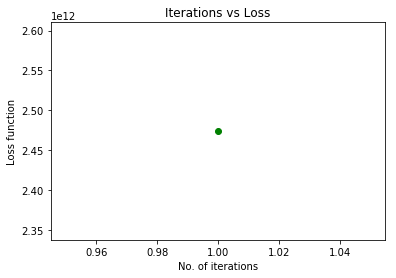

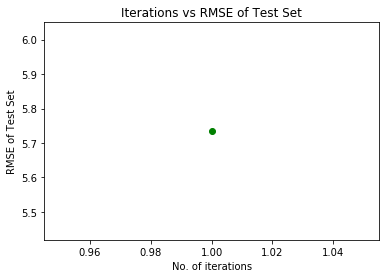

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Alpha :  1e-08


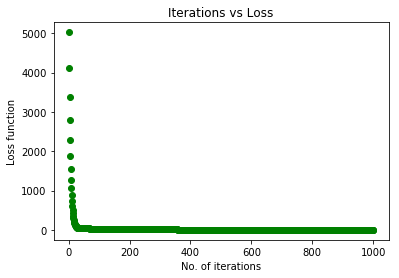

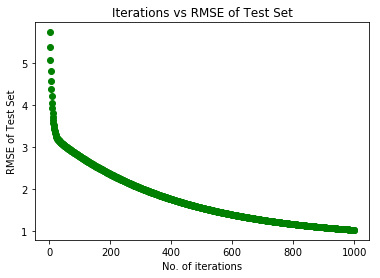

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Alpha :  1e-09


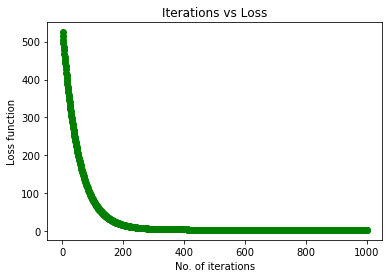

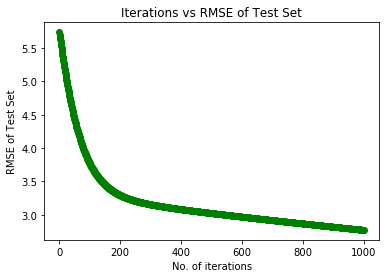

In [10]:
#Original scales in data, using three alphas
alpha = 0.001
gradientDescent(xTrainRed,yTrainRed,xTestRed,yTestRed,alpha)
#Converges in one iteration since the alpha value is very less, difference in loss function becomes negative 
#which cannot result in minimum beta

alpha = 0.00000001
gradientDescent(xTrainRed,yTrainRed,xTestRed,yTestRed,alpha)
#Minimum beta for which the difference in loss function is positive, but does not converge in 1000 iterations
#needs almost 20,000 iterations to converge

alpha = 0.000000001
gradientDescent(xTrainRed,yTrainRed,xTestRed,yTestRed,alpha)
#Reducing the beta beyond this futher only reduces the convergence rate

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.18953369]
 [ 0.01062298]
 [ 0.00525829]
 [ 0.04285274]
 [ 0.0019873 ]
 [ 0.01074   ]
 [-0.00298948]
 [ 0.02982972]
 [ 0.10239619]
 [ 0.0228223 ]
 [ 0.33580345]
 [ 0.03000945]]
No.of iterations:  175

Alpha :  9.5367431640625e-07


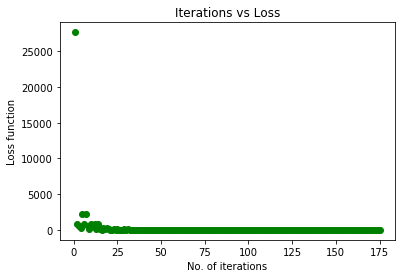

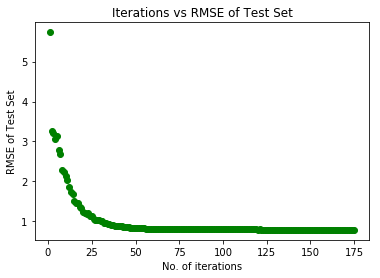

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.16565626]
 [ 0.00827652]
 [ 0.00416233]
 [ 0.03609966]
 [ 0.00186282]
 [ 0.00966953]
 [-0.00297167]
 [ 0.03133974]
 [ 0.10879991]
 [ 0.02606726]
 [ 0.35509564]
 [ 0.03156317]]
No.of iterations:  599

Alpha :  4.1961669921875006e-07


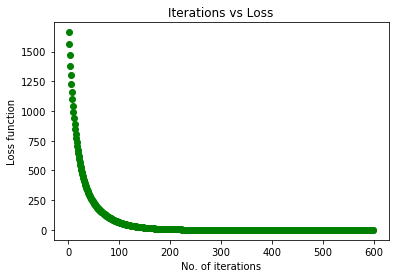

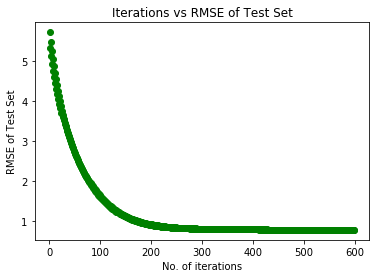

In [11]:
#Calling armijo step length function for original scale
gradientDescent_StepLength(xTrainRed,yTrainRed,xTestRed,yTestRed,"Armijo")

#Calling armijo step length function for original scale
gradientDescent_StepLength(xTrainRed,yTrainRed,xTestRed,yTestRed,"Bold driver")

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[  3.17621100e+01]
 [  1.27531300e+00]
 [  1.54757200e+00]
 [  2.93223600e+01]
 [  2.09487600e-01]
 [  1.64026900e+02]
 [  6.35155300e+02]
 [  4.61478271e+00]
 [  1.48181220e+01]
 [  2.28183400e+00]
 [  4.92162920e+01]
 [  4.64320000e+00]]
No.of iterations:  1

Alpha :  0.0001


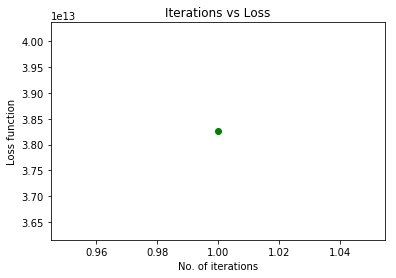

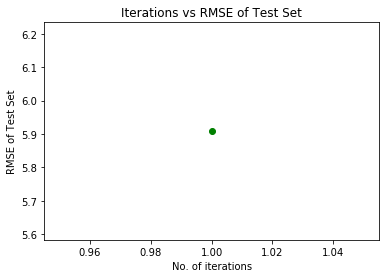

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Alpha :  1e-08


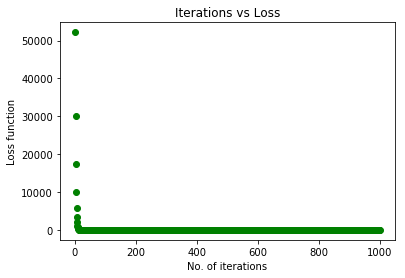

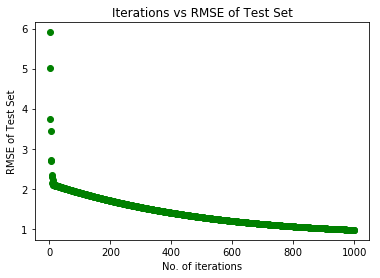

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Alpha :  1e-09


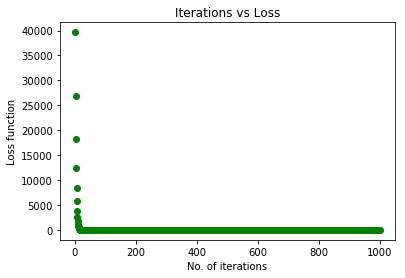

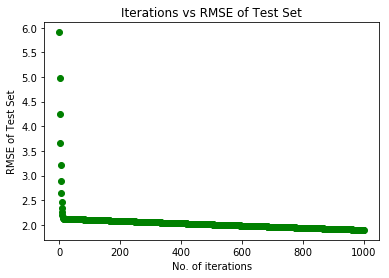

In [12]:
#White
#Normalized scales in data, using three alphas
alpha = 0.0001
gradientDescent(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,alpha)
#Converges in one iteration since the alpha value is very less, difference in loss function becomes negative 
#which cannot result in minimum beta

alpha = 0.00000001
gradientDescent(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,alpha)
#Minimum beta for which the difference in loss function is positive, coverges within 100 iterations 
#due to feature scaling

alpha = 0.000000001
gradientDescent(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,alpha)
#Reducing the beta beyond this futher only reduces the convergence rate

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.10148574]
 [ 0.00338033]
 [ 0.00455752]
 [-0.00471499]
 [ 0.00038688]
 [ 0.0131499 ]
 [ 0.01499967]
 [ 0.0156868 ]
 [ 0.05116852]
 [ 0.00736399]
 [ 0.20588235]
 [ 0.01587867]]
No.of iterations:  374

Alpha :  2.9802322387695312e-08


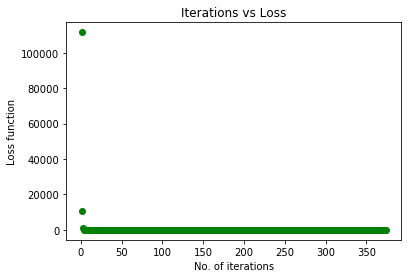

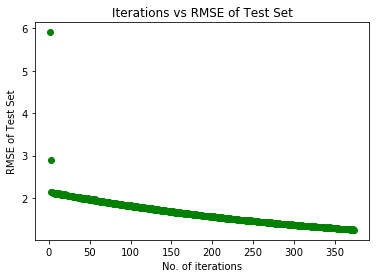

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.16565626]
 [ 0.00827652]
 [ 0.00416233]
 [ 0.03609966]
 [ 0.00186282]
 [ 0.00966953]
 [-0.00297167]
 [ 0.03133974]
 [ 0.10879991]
 [ 0.02606726]
 [ 0.35509564]
 [ 0.03156317]]
No.of iterations:  599

Alpha :  4.1961669921875006e-07


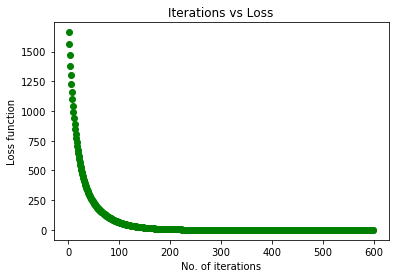

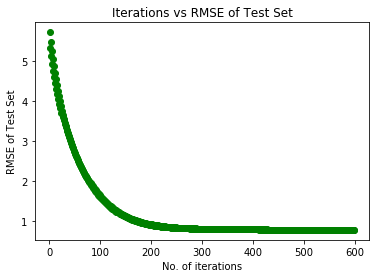

In [13]:
#WhiteWine
#Calling armijo step length function
gradientDescent_StepLength(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,"Armijo")

#Calling armijo step length function for original scale
gradientDescent_StepLength(xTrainRed,yTrainRed,xTestRed,yTestRed,"Bold driver")

In [14]:
#RedWine

#Since, the features have difference in scale, they may take long time to converge, using min-max standardization
#to get convergence
for each in wineRed.columns.values:
    wineRed[each] = (wineRed[each] - wineRed[each].mean())/wineRed[each].std()

#Using the same split, so the data is not resampled
trainRed = wineRed[redSplit]


print("Train shape : ",trainRed.shape,"\nTest shape : ",testRed.shape)
print(trainRed.head())

#1. Seperating x and y data
xTrainRed = trainRed.loc[:,trainRed.columns != 'quality']
yTrainRed = trainRed.loc[:,trainRed.columns == 'quality']

#Adding bias
xTrainRed = np.column_stack([xTrainRed,np.ones(len(xTrainRed))]) 

Train shape :  (1276, 12) 
Test shape :  (323, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1      -0.298454          1.966827    -1.391037        0.043403   0.223805   
2      -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3       1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4      -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
5      -0.528194          0.738187    -1.391037       -0.524002  -0.264878   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
1             0.872365              0.624168  0.028252 -0.719708   0.128910   
2            -0.083643              0.228975  0.134222 -0.331073  -0.048074   
3             0.107558              0.411372  0.664069 -0.978798  -0.461036   
4            -0.466047             -0.379014  0.558100  1.288240  -0.579025   
5            -0.274845             -0.196617  0.558100  1.288240  -0.579025   

    a

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.2899877 ]
 [-0.91610684]
 [ 0.52353753]
 [ 0.12364715]
 [-0.33398348]
 [-0.12909123]
 [-0.47484248]
 [-0.44366733]
 [-0.12934138]
 [ 0.60402878]
 [ 1.19541133]
 [-0.02864083]]
No.of iterations:  1

Alpha :  0.001


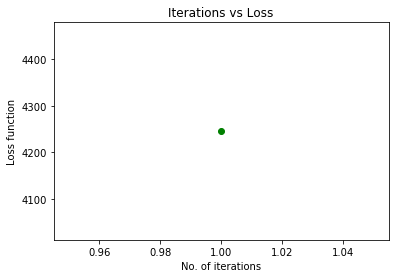

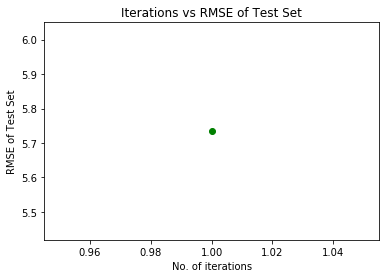

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.10005752]
 [-0.20321965]
 [-0.03992212]
 [ 0.07855833]
 [-0.11700847]
 [ 0.03862921]
 [-0.12659102]
 [-0.09992895]
 [-0.06141254]
 [ 0.21385059]
 [ 0.3424646 ]
 [-0.00230473]]
No.of iterations:  24

Alpha :  0.0001


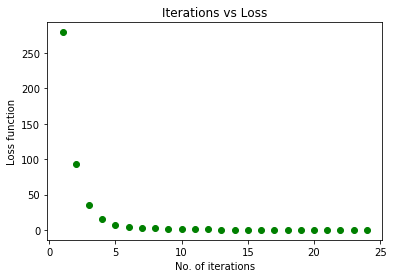

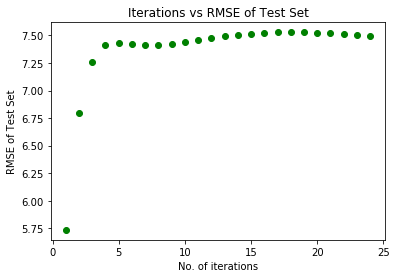

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.05402713]
 [-0.17229645]
 [ 0.05968963]
 [ 0.04765316]
 [-0.0837399 ]
 [ 0.00208373]
 [-0.09417466]
 [-0.0950775 ]
 [-0.02169155]
 [ 0.14272209]
 [ 0.26483594]
 [-0.00463851]]
No.of iterations:  474

Alpha :  1e-06


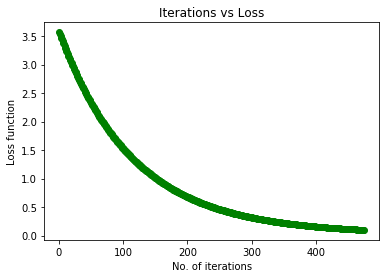

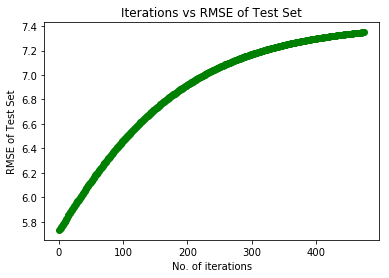

In [15]:
#Normalized scales in data, using three alphas
alpha = 0.001
gradientDescent(xTrainRed,yTrainRed,xTestRed,yTestRed,alpha)
#Converges in one iteration since the alpha value is very less, difference in loss function becomes negative 
#which cannot result in minimum beta

alpha = 0.0001
gradientDescent(xTrainRed,yTrainRed,xTestRed,yTestRed,alpha)
#Minimum beta for which the difference in loss function is positive, coverges within 100 iterations 
#due to feature scaling

alpha = 0.000001
gradientDescent(xTrainRed,yTrainRed,xTestRed,yTestRed,alpha)
#Reducing the beta beyond this futher only reduces the convergence rate

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.11909145]
 [-0.21942439]
 [-0.0803555 ]
 [ 0.07820459]
 [-0.1109781 ]
 [ 0.03658359]
 [-0.11917882]
 [-0.09805498]
 [-0.06378893]
 [ 0.21432844]
 [ 0.35346529]
 [-0.00151737]]
No.of iterations:  34

Alpha :  0.000244140625


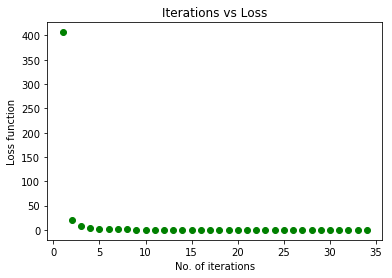

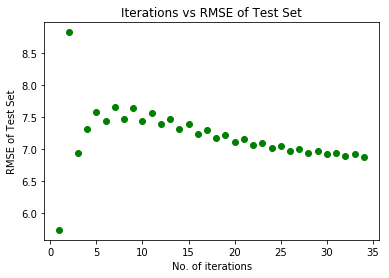

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.11227578]
 [-0.21463282]
 [-0.0707451 ]
 [ 0.07836447]
 [-0.1139404 ]
 [ 0.03932034]
 [-0.12364902]
 [-0.09772576]
 [-0.06587207]
 [ 0.21532148]
 [ 0.35090388]
 [-0.00167556]]
No.of iterations:  18

Alpha :  0.00042968750000000006


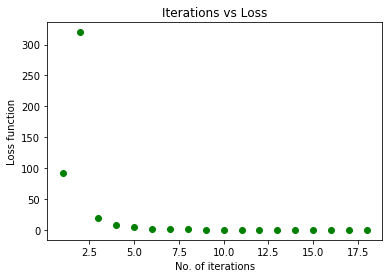

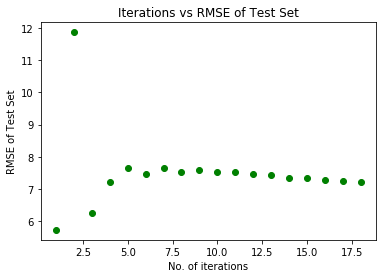

In [16]:
#Calling armijo step length function
gradientDescent_StepLength(xTrainRed,yTrainRed,xTestRed,yTestRed,"Armijo")

#Calling armijo step length function for original scale
gradientDescent_StepLength(xTrainRed,yTrainRed,xTestRed,yTestRed,"Bold driver")

In [17]:
#Whitewine

#Since, the features have difference in scale, they may take long time to converge, using min-max standardization
#to get convergence
for each in wineWhite.columns.values:
    wineWhite[each] = (wineWhite[each] - wineWhite[each].mean())/wineWhite[each].std()

#Using the same split, so the data is not resampled
trainWhite = wineWhite[whiteSplit]


print("Train shape : ",trainWhite.shape,"\nTest shape : ",testWhite.shape)
print(trainWhite.head())

#1. Seperating x and y data
xTrainWhite = trainWhite.loc[:,trainWhite.columns != 'quality']
yTrainWhite = trainWhite.loc[:,trainWhite.columns == 'quality']

#Adding bias
xTrainWhite = np.column_stack([xTrainWhite,np.ones(len(xTrainWhite))])

Train shape :  (3944, 12) 
Test shape :  (954, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.172079         -0.081762     0.213258        2.821061  -0.035351   
3       0.409083         -0.478608    -0.117266        0.415726   0.559670   
5       1.475600          0.017450     0.543783        0.100272   0.193503   
6      -0.775936          0.414297    -1.439364        0.119988  -0.035351   
7       0.172079         -0.081762     0.213258        2.821061  -0.035351   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.569873              0.744489  2.331274 -1.246794  -0.349149   
3             0.687471              1.120977  0.525802  0.011479  -0.787262   
5            -0.312109             -0.973236  0.358628  0.475053  -0.436771   
6            -0.312109             -0.055547  0.291759 -0.054746  -0.173903   
7             0.569873              0.744489  2.331274 -1.246794  -0.349149   

    a

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[-0.87369238]
 [-1.50477087]
 [-0.04447268]
 [-0.8149661 ]
 [-1.74550185]
 [ 0.2410775 ]
 [-1.21125795]
 [-2.4523352 ]
 [ 0.77628266]
 [ 0.53400335]
 [ 3.45622444]
 [ 0.07570926]]
No.of iterations:  1

Alpha :  0.001


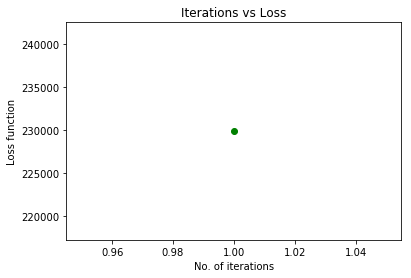

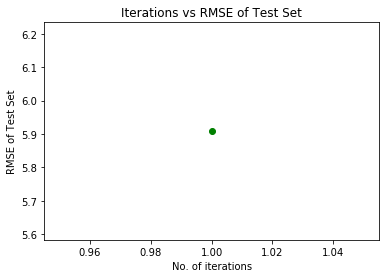

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.04314312]
 [-0.21664211]
 [ 0.00263587]
 [ 0.37957957]
 [-0.01240868]
 [ 0.09973807]
 [-0.00576857]
 [-0.41103393]
 [ 0.08965199]
 [ 0.08342763]
 [ 0.31561133]
 [ 0.0053072 ]]
No.of iterations:  122

Alpha :  5e-05


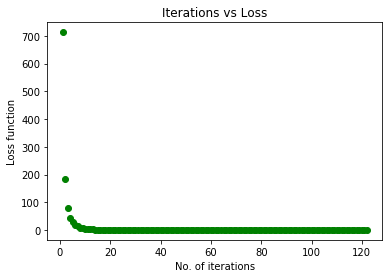

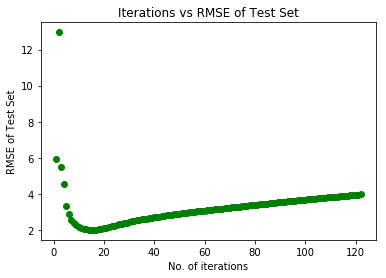

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[-0.02682631]
 [-0.19765175]
 [ 0.01344911]
 [ 0.16431009]
 [-0.05272684]
 [ 0.1155911 ]
 [-0.02891284]
 [-0.14300413]
 [ 0.03515678]
 [ 0.06867905]
 [ 0.37834176]
 [ 0.00648832]]
No.of iterations:  487

Alpha :  1e-06


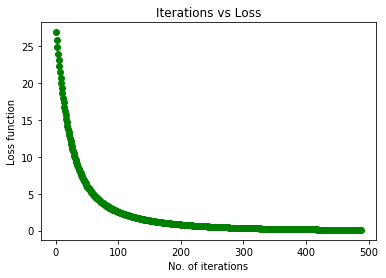

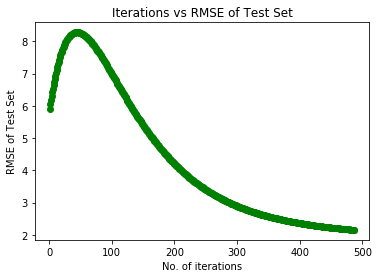

In [18]:
#Normalized scales in data, using three alphas
alpha = 0.001
gradientDescent(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,alpha)
#Converges in one iteration since the alpha value is very less, difference in loss function becomes negative 
#which cannot result in minimum beta

alpha = 0.00005
gradientDescent(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,alpha)
#Minimum beta for which the difference in loss function is positive, coverges within 100 iterations 
#due to feature scaling

alpha = 0.000001
gradientDescent(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,alpha)
#Reducing the beta beyond this futher only reduces the convergence rate

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.03251156]
 [-0.21737337]
 [ 0.00289001]
 [ 0.34902838]
 [-0.0125507 ]
 [ 0.10337896]
 [-0.00642817]
 [-0.35407975]
 [ 0.07963729]
 [ 0.08097673]
 [ 0.33899391]
 [ 0.00536831]]
No.of iterations:  54

Alpha :  0.0001220703125


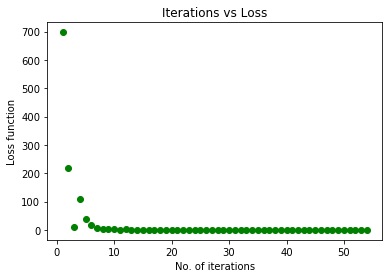

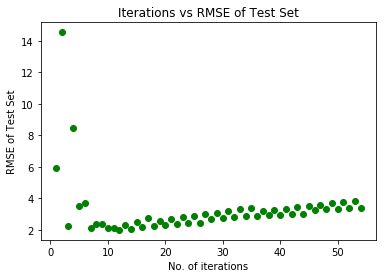

Initial Beta : 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Optimal Beta found : 
 [[ 0.11227578]
 [-0.21463282]
 [-0.0707451 ]
 [ 0.07836447]
 [-0.1139404 ]
 [ 0.03932034]
 [-0.12364902]
 [-0.09772576]
 [-0.06587207]
 [ 0.21532148]
 [ 0.35090388]
 [-0.00167556]]
No.of iterations:  18

Alpha :  0.00042968750000000006


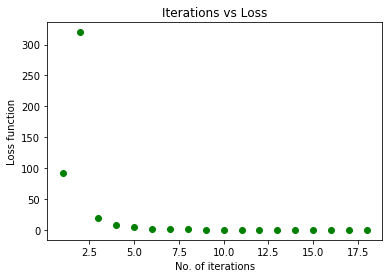

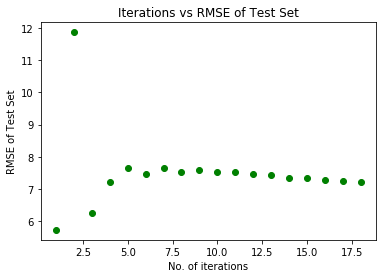

In [19]:
#Calling armijo step length function
gradientDescent_StepLength(xTrainWhite,yTrainWhite,xTestWhite,yTestWhite,"Armijo")

#Calling armijo step length function for original scale
gradientDescent_StepLength(xTrainRed,yTrainRed,xTestRed,yTestRed,"Bold driver")